In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

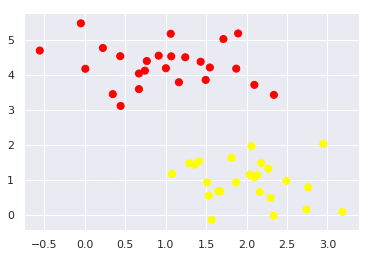

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

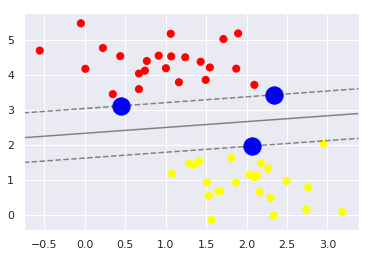

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=300, linewidth=1,facecolors='blue')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Text(0.5,1,'N=60')

Text(0.5,1,'N=120')

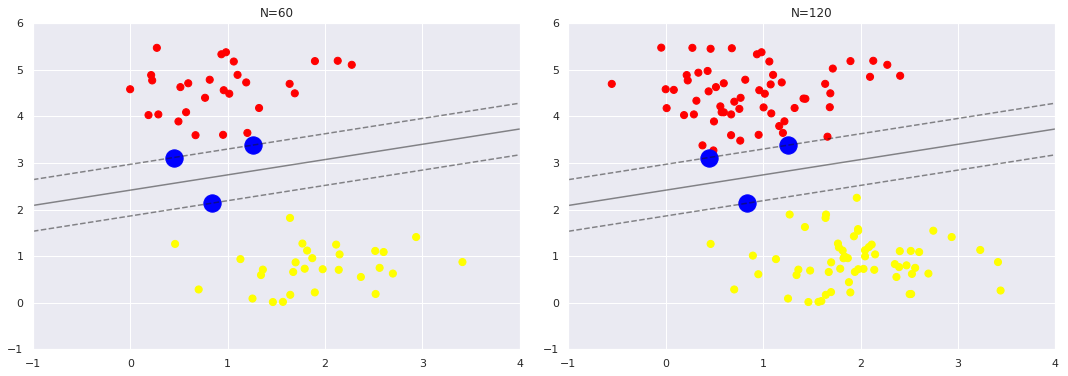

In [6]:
def plot_svm(N=10, ax=None):
    X,y = make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi, N in zip(ax, [60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

In [7]:
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,20,50,100,200],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 50, 100, 200), value=10), Output()), _dom_cla…

<function __main__.plot_svm(N=10, ax=None)>

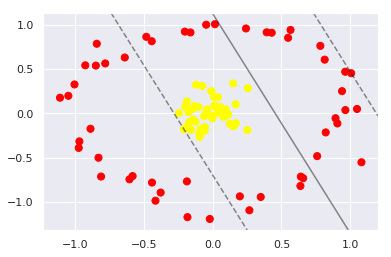

In [9]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100,factor=.1,noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

In [10]:
r = np.exp(-(X**2).sum(1))
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D,elev=[0,20,40,90],azip=(-180,180),X=fixed(X),y=fixed(y))



interactive(children=(Dropdown(description='elev', options=(0, 20, 40, 90), value=0), IntSlider(value=30, desc…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 9.64737158e-01,  3.61606580e-02],
       [-9.42245716e-02, -2.25264761e-01],
       [-6.37144149e-01,  6.28636586e-01],
       [ 2.67837225e-01, -1.09319751e+00],
       [-9.71569272e-01, -3.90145920e-01],
       [-9.44034458e-02, -2.66632001e-01],
       [-4.14176456e-01, -9.85384006e-01],
       [ 2.52871768e-01, -1.89464450e-01],
       [-8.47246935e-01,  5.37168095e-01],
       [ 6.38175548e-01, -8.19598817e-01],
       [ 3.49986286e-01, -9.43121795e-01],
       [ 9.40427010e-01,  2.49366593e-01],
       [-1.04682512e+00,  1.96842302e-01],
       [ 1.75465139e-02,  1.00406176e+00],
       [-1.85979168e-01, -7.67773663e-01],
       [ 5.61646160e-02,  6.97355415e-02],
       [ 6.41240406e-01, -7.14029508e-01],
       [-8.27981120e-01, -5.01208383e-01],
       [ 8.93212639e-01, -5.56375854e-02],
       [ 2.42984294e-01,  9.55664541e-01],
       [ 1.14638743e-02,  1.83483755e-01],
       [ 8.14495035e-01,  6.04313393e-01],
       

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

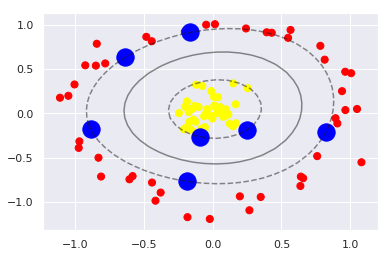

In [12]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none')


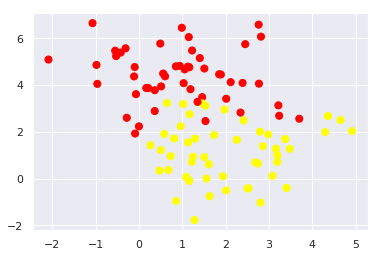

In [13]:
X,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

Text(0.5,1,'C = 10.0')

Text(0.5,1,'C = 0.1')

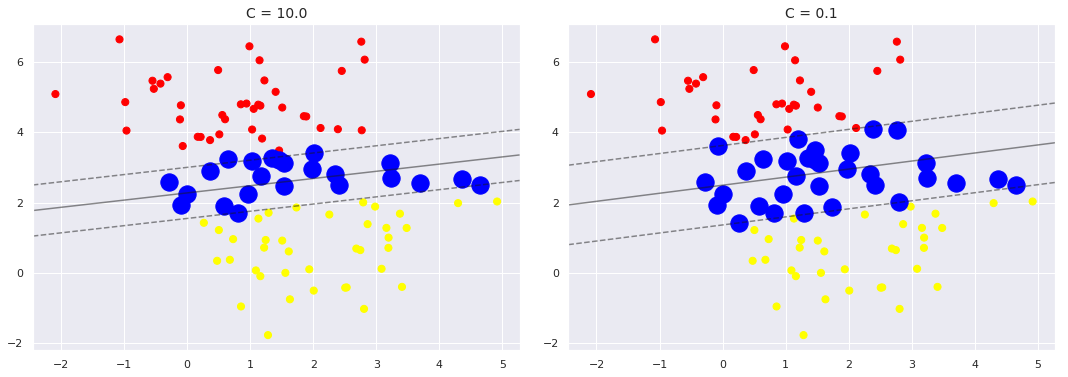

In [14]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10.0,0.1]):
    model = SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,lw=1,facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C),size=14)